In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors,preprocessing

## Importing data

In [2]:
# read the data 
train_data= pd.read_csv("D:\\Capstone project\\Capstone Project\\train Data.csv",low_memory=False)
#print(train_data.columns.values),low_memory=False
train_data.head()

,id,release,n_0000,n_0001,n_0002,n_0003,n_0004,n_0005,n_0006,n_0007,...,c_1368,c_1369,c_1370,c_1371,c_1372,c_1373,c_1374,c_1375,c_1376,c_1377
0,11193,a,NaN,NaN,0.025449,NaN,NaN,0.368421,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,q,NaN,NaN,NaN
1,11382,a,NaN,NaN,0.031297,NaN,NaN,0.315789,NaN,NaN,...,NaN,NaN,a,NaN,a,NaN,NaN,NaN,NaN,NaN
2,16531,a,NaN,NaN,0.024475,NaN,NaN,0.342105,NaN,NaN,...,NaN,NaN,a,NaN,a,NaN,b,NaN,NaN,NaN
3,1896,a,NaN,NaN,0.041694,NaN,NaN,0.447368,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN
4,18262,c,NaN,NaN,0.038120,NaN,NaN,0.315789,NaN,NaN,...,NaN,NaN,b,NaN,a,NaN,a,NaN,NaN,NaN


In [3]:
train_data.shape

(14644, 1379)

In [4]:
train_data.columns

Index(['id', 'release', 'n_0000', 'n_0001', 'n_0002', 'n_0003', 'n_0004',
       'n_0005', 'n_0006', 'n_0007',
       ...
       'c_1368', 'c_1369', 'c_1370', 'c_1371', 'c_1372', 'c_1373', 'c_1374',
       'c_1375', 'c_1376', 'c_1377'],
      dtype='object', length=1379)

## creating dataframe for missing values

In [5]:
missdf=pd.DataFrame({'cols':train_data.columns.values,
                          'missing':list(train_data.isnull().sum())})

In [6]:
missdf['missingPerc'] = missdf.missing/train_data.shape[0]

In [7]:
missdf.head()

,cols,missing,missingPerc
0,id,0,0.000000
1,release,0,0.000000
2,n_0000,14625,0.998703
3,n_0001,13884,0.948102
4,n_0002,644,0.043977


In [8]:
#percentage of missing data
train_data1=pd.DataFrame(train_data[missdf[missdf['missingPerc']<0.8]['cols']])

In [9]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Columns: 341 entries, id to c_1377
dtypes: float64(63), int64(9), object(269)
memory usage: 38.1+ MB


## Train data after removal of null columns

In [10]:
train_data1.head()

,id,release,n_0002,n_0005,n_0012,n_0019,n_0028,n_0034,n_0038,n_0039,...,c_1333,c_1335,c_1343,c_1347,c_1348,c_1361,c_1363,c_1372,c_1374,c_1377
0,11193,a,0.025449,0.368421,0.292683,0.0,NaN,0.223881,0.193548,NaN,...,e,w,b,NaN,b,e,b,a,q,NaN
1,11382,a,0.031297,0.315789,0.243902,0.0,NaN,0.104478,0.177419,NaN,...,e,q,b,NaN,b,e,b,a,NaN,NaN
2,16531,a,0.024475,0.342105,0.304878,0.0,NaN,0.119403,0.290323,NaN,...,e,u,a,NaN,b,c,a,a,b,NaN
3,1896,a,0.041694,0.447368,0.207317,0.0,NaN,0.149254,0.370968,NaN,...,NaN,w,a,NaN,b,g,a,a,NaN,NaN
4,18262,c,0.038120,0.315789,0.219512,0.0,NaN,0.074627,0.177419,0.3125,...,e,b,b,d,b,e,b,a,a,NaN


In [11]:
#cols=train_data1.columns
cols=train_data1.columns


 ## Data of Numerical columns 

In [12]:
#train_data1.select_dtypes(exclude=['object'])
num_cols=pd.DataFrame(train_data1.select_dtypes(include=['number']))
num_cols.head()
#train_data1.select_dtypes(include=['number']).head()


,id,n_0002,n_0005,n_0012,n_0019,n_0028,n_0034,n_0038,n_0039,n_0047,...,o_0270,o_0274,o_0276,o_0279,o_0285,o_0286,o_0301,o_0314,o_0315,o_0323
0,11193,0.025449,0.368421,0.292683,0.0,NaN,0.223881,0.193548,NaN,1,...,NaN,27.0,NaN,10.0,NaN,15.0,12.0,NaN,0.0,NaN
1,11382,0.031297,0.315789,0.243902,0.0,NaN,0.104478,0.177419,NaN,1,...,6.0,33.0,NaN,14.0,NaN,14.0,10.0,NaN,0.0,NaN
2,16531,0.024475,0.342105,0.304878,0.0,NaN,0.119403,0.290323,NaN,1,...,3.0,23.0,NaN,32.0,NaN,5.0,6.0,NaN,NaN,NaN
3,1896,0.041694,0.447368,0.207317,0.0,NaN,0.149254,0.370968,NaN,1,...,6.0,46.0,NaN,NaN,NaN,30.0,8.0,NaN,0.0,NaN
4,18262,0.038120,0.315789,0.219512,0.0,NaN,0.074627,0.177419,0.3125,1,...,9.0,40.0,NaN,20.0,NaN,19.0,13.0,0.0,0.0,0.0


In [13]:
num_cols.columns

Index(['id', 'n_0002', 'n_0005', 'n_0012', 'n_0019', 'n_0028', 'n_0034',
       'n_0038', 'n_0039', 'n_0047', 'n_0048', 'n_0050', 'n_0051', 'n_0052',
       'n_0059', 'n_0060', 'n_0061', 'n_0064', 'n_0066', 'n_0067', 'n_0071',
       'n_0074', 'n_0075', 'n_0078', 'n_0083', 'n_0086', 'n_0091', 'n_0095',
       'n_0099', 'n_0100', 'n_0102', 'n_0108', 'n_0109', 'n_0110', 'o_0120',
       'o_0125', 'o_0129', 'o_0132', 'o_0141', 'o_0144', 'o_0147', 'o_0152',
       'o_0153', 'o_0154', 'o_0157', 'o_0168', 'o_0175', 'o_0176', 'o_0179',
       'o_0201', 'o_0202', 'o_0208', 'o_0217', 'o_0221', 'o_0223', 'o_0230',
       'o_0231', 'o_0241', 'o_0248', 'o_0264', 'o_0265', 'o_0268', 'o_0270',
       'o_0274', 'o_0276', 'o_0279', 'o_0285', 'o_0286', 'o_0301', 'o_0314',
       'o_0315', 'o_0323'],
      dtype='object')

## Imputing missing values of numerical data

In [14]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values=np.nan, strategy='median', axis=0)
imputer=imputer.fit(num_cols)
imputed_data=imputer.transform(num_cols.values)
num_cols1=pd.DataFrame(imputed_data,columns=num_cols.columns)
num_cols1.head()

,id,n_0002,n_0005,n_0012,n_0019,n_0028,n_0034,n_0038,n_0039,n_0047,...,o_0270,o_0274,o_0276,o_0279,o_0285,o_0286,o_0301,o_0314,o_0315,o_0323
0,11193.0,0.025449,0.368421,0.292683,0.0,0.045455,0.223881,0.193548,0.208333,1.0,...,5.0,27.0,1.0,10.0,1.0,15.0,12.0,0.0,0.0,0.0
1,11382.0,0.031297,0.315789,0.243902,0.0,0.045455,0.104478,0.177419,0.208333,1.0,...,6.0,33.0,1.0,14.0,1.0,14.0,10.0,0.0,0.0,0.0
2,16531.0,0.024475,0.342105,0.304878,0.0,0.045455,0.119403,0.290323,0.208333,1.0,...,3.0,23.0,1.0,32.0,1.0,5.0,6.0,0.0,0.0,0.0
3,1896.0,0.041694,0.447368,0.207317,0.0,0.045455,0.149254,0.370968,0.208333,1.0,...,6.0,46.0,1.0,29.0,1.0,30.0,8.0,0.0,0.0,0.0
4,18262.0,0.038120,0.315789,0.219512,0.0,0.045455,0.074627,0.177419,0.312500,1.0,...,9.0,40.0,1.0,20.0,1.0,19.0,13.0,0.0,0.0,0.0


## Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
num_cols1 = StandardScaler().fit_transform(num_cols1)

## PCA for Numerical data

In [16]:
from sklearn.decomposition import PCA
pca=PCA(.80)## It explains only 80% of information of data (variance)
#pca = PCA(n_components=30)
print(pca)
num_cols2=pca.fit_transform(num_cols1)
#pca.explained_variance_ratio_
pca_components=pca.n_components_
pca_components

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


38

[ 0.10957094  0.05517021  0.04353973  0.03887716  0.03235958  0.02671965
  0.02628239  0.02242339  0.01999731  0.01939875  0.01849289  0.01823029
  0.01749316  0.01729571  0.01646379  0.01613038  0.01593858  0.01572859
  0.01567793  0.0156186   0.01535169  0.01512557  0.01502345  0.01482267
  0.01472097  0.01458605  0.01449421  0.01438068  0.01397057  0.01387584
  0.01347677  0.0132305   0.01300499  0.01281318  0.0125942   0.01246074
  0.01244183  0.01206752]


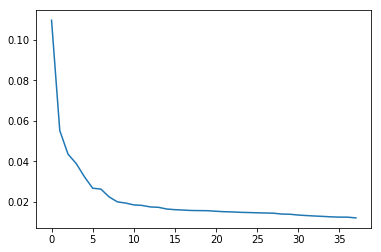

In [17]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print(var)
plt.plot(var)
plt.show()

### Numerical Dataframe after PCA

In [18]:
num_cols3=pd.DataFrame(num_cols2,columns=range(pca_components))
num_cols3.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,6.076627,-0.575677,-0.841880,2.313944,0.844188,-1.124082,-2.584006,-0.594535,0.939601,-0.818944,...,-0.232521,-0.236592,0.908256,0.185777,0.063665,0.162707,-0.689815,1.252231,0.786739,0.841315
1,3.836042,0.261186,-0.171489,2.210323,-0.552976,-1.470234,-0.944588,-0.087564,0.673511,0.924485,...,0.741431,-0.466551,-0.285145,0.452369,-0.418338,-0.061422,1.132073,0.632208,0.095734,0.971994
2,4.018008,3.167597,-0.223201,-1.768088,-0.478885,-2.902527,0.474748,-0.042028,-0.159062,0.415008,...,-0.048935,0.937004,-0.931084,1.254646,-1.259625,-0.150548,-0.322628,-0.026147,0.010269,-0.705993
3,0.770249,0.819915,-0.247511,-1.506793,0.210980,1.277786,0.028599,1.994898,-0.369985,-0.451570,...,-1.241423,0.371171,-0.443772,-1.119460,1.656568,-0.067804,-1.059020,-0.835921,0.613648,-0.869783
4,1.525670,0.431122,3.045903,1.629937,-2.787773,0.009762,-2.714656,1.502891,0.979560,2.698379,...,-0.190738,-1.264388,-0.912625,1.190297,0.039980,-1.009747,-0.134169,0.374120,-1.175972,-1.003526


## fill missing values with fillna() method----Another way

In [19]:
#num_cols.fillna(num_cols.mean(), inplace=True)
#num_cols.head()

## Data of categorical values

In [20]:
cat_cols=pd.DataFrame(train_data1.select_dtypes(include=['object']))
cat_cols.head()

,release,c_0332,c_0337,c_0339,c_0348,c_0351,c_0357,c_0361,c_0364,c_0368,...,c_1333,c_1335,c_1343,c_1347,c_1348,c_1361,c_1363,c_1372,c_1374,c_1377
0,a,NaN,a,NaN,f,o,NaN,NaN,a,b,...,e,w,b,NaN,b,e,b,a,q,NaN
1,a,NaN,a,NaN,k,s,NaN,NaN,a,b,...,e,q,b,NaN,b,e,b,a,NaN,NaN
2,a,NaN,b,NaN,p,f,NaN,NaN,b,b,...,e,u,a,NaN,b,c,a,a,b,NaN
3,a,NaN,a,NaN,f,o,NaN,NaN,b,b,...,NaN,w,a,NaN,b,g,a,a,NaN,NaN
4,c,a,a,b,t,c,NaN,b,a,b,...,e,b,b,d,b,e,b,a,a,NaN


In [21]:
cat_cols.isnull().sum().head()

release        0
c_0332     11478
c_0337      4559
c_0339     11473
c_0348      5810
dtype: int64

In [22]:
cat_cols.values

array([['a', nan, 'a', ..., 'a', 'q', nan],
       ['a', nan, 'a', ..., 'a', nan, nan],
       ['a', nan, 'b', ..., 'a', 'b', nan],
       ..., 
       ['c', 'a', 'b', ..., 'a', nan, 'b'],
       ['b', nan, nan, ..., 'a', nan, nan],
       ['a', nan, 'a', ..., 'a', nan, nan]], dtype=object)

from sklearn.preprocessing import Imputer
imputer =Imputer(missing_values=np.nan, strategy='most_frequent', axis=0)
imputer=imputer.fit(cat_cols)
imputed_data=imputer.transform(cat_cols.values)
cat_cols1=pd.DataFrame(imputed_data,columns=cat_cols.columns)
cat_cols1.head()

In [23]:
cat_cols.isnull().sum().head()

release        0
c_0332     11478
c_0337      4559
c_0339     11473
c_0348      5810
dtype: int64

In [24]:
cat_cols.head()

,release,c_0332,c_0337,c_0339,c_0348,c_0351,c_0357,c_0361,c_0364,c_0368,...,c_1333,c_1335,c_1343,c_1347,c_1348,c_1361,c_1363,c_1372,c_1374,c_1377
0,a,NaN,a,NaN,f,o,NaN,NaN,a,b,...,e,w,b,NaN,b,e,b,a,q,NaN
1,a,NaN,a,NaN,k,s,NaN,NaN,a,b,...,e,q,b,NaN,b,e,b,a,NaN,NaN
2,a,NaN,b,NaN,p,f,NaN,NaN,b,b,...,e,u,a,NaN,b,c,a,a,b,NaN
3,a,NaN,a,NaN,f,o,NaN,NaN,b,b,...,NaN,w,a,NaN,b,g,a,a,NaN,NaN
4,c,a,a,b,t,c,NaN,b,a,b,...,e,b,b,d,b,e,b,a,a,NaN


## Label Encoding

In [25]:

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
le.fit_transform(cat_cols[cat_cols.columns[0]])
 

array([0, 0, 0, ..., 2, 1, 0], dtype=int64)

In [45]:
X=cat_cols
X.shape[1]
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
# encode string input values as integers
features = []
for i in range(0, X.shape[1]):
    le= LabelEncoder()
    feature = le.fit_transform(X[:,i])
    features.append(feature)
encoded_x = numpy.array(features)
encoded_x = encoded_x.reshape(X.shape[0], X.shape[1])

TypeError: unhashable type: 'slice'

In [27]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()
#X = enc.fit_transform()

## Create dummies for categorical data

In [46]:
cat_cols1=pd.get_dummies(cat_cols,drop_first=True)
cat_cols1.head()

,release_b,release_c,c_0332_b,c_0337_b,c_0339_b,c_0348_b,c_0348_c,c_0348_d,c_0348_e,c_0348_f,...,c_1374_p,c_1374_q,c_1374_r,c_1374_s,c_1374_t,c_1374_u,c_1374_v,c_1374_w,c_1374_x,c_1377_b
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Standardizing the features before PCA 

In [29]:
from sklearn.preprocessing import StandardScaler
cat_cols1 = StandardScaler().fit_transform(cat_cols1)

## PCA  dimension reduction for Categorical data
The code below has .60 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 60% of the variance is retained.

In [30]:
from sklearn.decomposition import PCA
pca=PCA(.6)## It explains only 60% of information of data (variance)
#pca = PCA(n_components=100)
print(pca)
cat_cols2=pca.fit_transform(cat_cols1)
#pca.explained_variance_ratio_
pca_components=pca.n_components_
pca_components

PCA(copy=True, iterated_power='auto', n_components=0.6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


123

[ 0.03171528  0.02679084  0.02307744  0.01963542  0.01941157  0.0181244
  0.01801733  0.01558466  0.01480657  0.01465732  0.01419222  0.01409265
  0.01400228  0.01395287  0.01391766  0.01373173  0.01349338  0.01332586
  0.01309049  0.01164085  0.01135949  0.01053607  0.01045394  0.00700071
  0.00605292  0.00520953  0.00455433  0.0044904   0.00447164  0.00444537
  0.00424553  0.00421997  0.00410363  0.00405043  0.00383458  0.00374302
  0.0036514   0.00359415  0.00351784  0.00346178  0.00342688  0.00340768
  0.00314029  0.00307171  0.00295943  0.00288854  0.00270594  0.00262733
  0.00260133  0.00256059  0.00251058  0.00244531  0.00243032  0.00237225
  0.00234707  0.00232253  0.00231439  0.00227472  0.00224692  0.00223045
  0.00221481  0.00218429  0.00215472  0.00213187  0.00210697  0.00207592
  0.00206476  0.00204608  0.00202497  0.00202059  0.00200557  0.00198145
  0.00197169  0.00196719  0.00194359  0.00193315  0.00189549  0.00187755
  0.00187198  0.00185721  0.00182985  0.00181128  0.

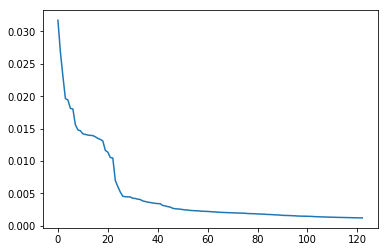

In [31]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print(var)
plt.plot(var)
plt.show()

[  3.17   5.85   8.16  10.12  12.06  13.87  15.67  17.23  18.71  20.18
  21.6   23.01  24.41  25.81  27.2   28.57  29.92  31.25  32.56  33.72
  34.86  35.91  36.96  37.66  38.27  38.79  39.25  39.7   40.15  40.59
  41.01  41.43  41.84  42.25  42.63  43.    43.37  43.73  44.08  44.43
  44.77  45.11  45.42  45.73  46.03  46.32  46.59  46.85  47.11  47.37
  47.62  47.86  48.1   48.34  48.57  48.8   49.03  49.26  49.48  49.7
  49.92  50.14  50.36  50.57  50.78  50.99  51.2   51.4   51.6   51.8   52.
  52.2   52.4   52.6   52.79  52.98  53.17  53.36  53.55  53.74  53.92
  54.1   54.28  54.46  54.63  54.8   54.97  55.14  55.31  55.48  55.64
  55.8   55.96  56.12  56.28  56.43  56.58  56.73  56.88  57.03  57.18
  57.33  57.47  57.61  57.75  57.89  58.03  58.17  58.3   58.43  58.56
  58.69  58.82  58.95  59.08  59.21  59.34  59.47  59.59  59.71  59.83
  59.95  60.07]


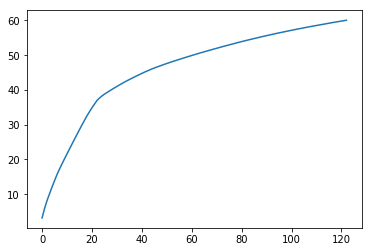

In [32]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.show()

In [33]:
cat_cols3=pd.DataFrame(cat_cols2,columns=range(pca_components))
cat_cols3.head()

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,3.581868,3.993950,-9.383716,-14.464161,-4.684847,-2.489567,0.926529,-0.531674,2.188912,-0.649593,...,0.321952,-1.051800,-0.051843,-0.598574,0.307658,-0.455928,-0.263026,-0.228196,-0.855808,1.085736
1,3.886403,16.359526,15.879674,-5.725220,-3.228268,0.168994,-0.427757,-0.364676,2.876326,-0.684591,...,1.145111,-0.744309,-0.648640,0.709765,-0.780606,1.998836,-1.655313,-0.693444,0.328394,0.002728
2,-3.781317,-6.378448,2.816940,6.942006,-3.165425,2.336307,-0.796793,0.554778,7.166021,2.299489,...,0.074709,-0.289329,0.191940,-0.323406,-0.079393,-0.275631,2.076520,-0.240698,1.155955,-0.105533
3,-0.610577,-4.950982,0.207735,-2.144006,-4.206213,0.367886,-0.077958,0.352046,6.331199,0.774564,...,-1.802636,-1.414444,0.291000,0.278857,1.403845,0.023136,2.196534,-2.295210,0.572164,-0.018833
4,13.659376,3.216031,-1.294321,1.416578,6.067459,4.824559,-3.179027,3.392819,-11.753718,18.941056,...,0.407923,0.977969,-0.505145,1.971435,1.280463,-0.834105,1.306852,-0.593003,-1.276879,0.481914


## Concat numerical and categorical data

In [34]:
train_data2=pd.concat([num_cols3,cat_cols3],axis=1)
#train_data2=pd.merge(numeric_cols,cat_cols,on='id',how='outer')

train_data2.shape
train_data2.head()

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,6.076627,-0.575677,-0.841880,2.313944,0.844188,-1.124082,-2.584006,-0.594535,0.939601,-0.818944,...,0.321952,-1.051800,-0.051843,-0.598574,0.307658,-0.455928,-0.263026,-0.228196,-0.855808,1.085736
1,3.836042,0.261186,-0.171489,2.210323,-0.552976,-1.470234,-0.944588,-0.087564,0.673511,0.924485,...,1.145111,-0.744309,-0.648640,0.709765,-0.780606,1.998836,-1.655313,-0.693444,0.328394,0.002728
2,4.018008,3.167597,-0.223201,-1.768088,-0.478885,-2.902527,0.474748,-0.042028,-0.159062,0.415008,...,0.074709,-0.289329,0.191940,-0.323406,-0.079393,-0.275631,2.076520,-0.240698,1.155955,-0.105533
3,0.770249,0.819915,-0.247511,-1.506793,0.210980,1.277786,0.028599,1.994898,-0.369985,-0.451570,...,-1.802636,-1.414444,0.291000,0.278857,1.403845,0.023136,2.196534,-2.295210,0.572164,-0.018833
4,1.525670,0.431122,3.045903,1.629937,-2.787773,0.009762,-2.714656,1.502891,0.979560,2.698379,...,0.407923,0.977969,-0.505145,1.971435,1.280463,-0.834105,1.306852,-0.593003,-1.276879,0.481914


## Import lables data(dependent)

In [35]:
train_labels= pd.read_csv("D:\\Capstone project\\Capstone Project\\train labels.csv")
train_labels1=pd.DataFrame(train_labels['service_a'])
train_labels1.shape
train_labels1.head()

,service_a
0,1
1,0
2,0
3,0
4,0


In [36]:
X=train_data2
y=train_labels1
y=np.array(train_labels1).ravel()
names=train_data2.columns
names

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            113, 114, 115, 116, 117, 118, 119, 120, 121, 122],
           dtype='int64', length=161)

In [37]:
y.shape

(14644,)

## Feature selection by using Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X,y)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))


Features sorted by their score:
[(0.15440000000000001, 3), (0.071900000000000006, 0), (0.052900000000000003, 41), (0.034700000000000002, 1), (0.0269, 10), (0.0258, 5), (0.0167, 11), (0.015599999999999999, 39), (0.0143, 35), (0.0126, 2), (0.0118, 9), (0.0094999999999999998, 31), (0.0094999999999999998, 8), (0.0086, 14), (0.0083999999999999995, 33), (0.0082000000000000007, 15), (0.0076, 34), (0.0076, 0), (0.0068999999999999999, 72), (0.0064999999999999997, 71), (0.0057000000000000002, 101), (0.0057000000000000002, 25), (0.0054000000000000003, 113), (0.0054000000000000003, 6), (0.0053, 40), (0.0053, 4), (0.0047999999999999996, 7), (0.0045999999999999999, 104), (0.0045999999999999999, 83), (0.0045999999999999999, 42), (0.0044999999999999997, 45), (0.0044000000000000003, 80), (0.0044000000000000003, 49), (0.0044000000000000003, 10), (0.0043, 121), (0.0043, 27), (0.0041999999999999997, 116), (0.0041999999999999997, 91), (0.0041999999999999997, 85), (0.0041999999999999997, 65), (0.00419999999

In [39]:
importances = rf.feature_importances_
importances[0]

0.071946680958500459

In [40]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
indices

array([ 41,   0,  79,  39,  48,  43,  49,  77,  73,  40,  47,  69,  46,
        52,  71,  53,  72,  38, 110, 109,  63, 139,  44, 151,  42,  78,
        45,  80, 142, 121,  83,  10,  87, 118,  65, 159, 123, 129, 103,
       154,   6,  26,  86,  20,  14, 107,   7, 153, 152,  56, 130,  82,
        35,  76,  57,  84,  24,  54, 146,  81,  74, 128, 160,  30, 117,
       106,  75, 126, 113,  32,  31, 137,  37,  93, 104, 111,  62,  22,
       124, 144, 141,  28,  67, 145,  17, 108, 148, 157, 149,  66,  96,
        29, 101, 132,   5,   1,   8,  15,  19,   3,  59,  18,  25,  12,
       140, 158,  51, 156, 136,   4, 116,  94, 100,  11,  55, 143, 112,
        21,  33,  64,  34,  85,  23,  61, 120,  95, 133,  88, 119,  60,
       147, 131, 150,  99, 105,   9,  13, 122, 135, 102,  97,   2, 138,
        92,  36, 115,  50, 127, 134, 114,  70, 125, 155,  68,  27,  16,
        91,  98,  89,  58,  90], dtype=int64)

In [41]:
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 41 (0.154382)
2. feature 0 (0.071947)
3. feature 79 (0.052917)
4. feature 39 (0.034672)
5. feature 48 (0.026861)
6. feature 43 (0.025778)
7. feature 49 (0.016684)
8. feature 77 (0.015581)
9. feature 73 (0.014328)
10. feature 40 (0.012572)
11. feature 47 (0.011787)
12. feature 69 (0.009466)
13. feature 46 (0.009456)
14. feature 52 (0.008592)
15. feature 71 (0.008446)
16. feature 53 (0.008204)
17. feature 72 (0.007611)
18. feature 38 (0.007597)
19. feature 110 (0.006923)
20. feature 109 (0.006513)
21. feature 63 (0.005727)
22. feature 139 (0.005657)
23. feature 44 (0.005364)
24. feature 151 (0.005351)
25. feature 42 (0.005311)
26. feature 78 (0.005280)
27. feature 45 (0.004784)
28. feature 80 (0.004603)
29. feature 142 (0.004602)
30. feature 121 (0.004602)
31. feature 83 (0.004455)
32. feature 10 (0.004446)
33. feature 87 (0.004418)
34. feature 118 (0.004359)
35. feature 65 (0.004318)
36. feature 159 (0.004257)
37. feature 123 (0.004247)
38. feature 129 (0.004225)
39. feature 

## Build the model

In [42]:
import xgboost
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
model=xgboost.XGBClassifier()
model.fit(np.array(X),y)
#print(model)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))